#Inspection of the Training  data

Inspect and visualize the training images and the corresponding ground truth data

## Installing and getting the crucial software libraries

In [1]:
!pip install imgaug
!pip install Cython
!pip install pycocotools


import time
import cv2
import datetime
import skimage.draw
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


##Download the workshop git repo to access the mask-rcnn software library and the dataset

In [2]:
os.chdir('/content')
!rm -rf Mask_RCNN
!git clone https://github.com/aneeshchauhan/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 2706 (delta 0), reused 1 (delta 0), pack-reused 2702
Receiving objects: 100% (2706/2706), 119.58 MiB | 16.06 MiB/s, done.
Resolving deltas: 100% (610/610), done.
Checking out files: 100% (1720/1720), done.


**Change to the workshop working directory**

In [3]:
os.chdir('/content/Mask_RCNN/samples')
!pwd

/content/Mask_RCNN/samples


**Setup to start using the library**

In [4]:
# Root directory of the project
ROOT_DIR = os.path.abspath("../")
print(ROOT_DIR)
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library

from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
from mrcnn.config import Config

from samples.leaf import leaf

#Root directory of the project
sys.path.append(ROOT_DIR)  # To find local version of the library

/content/Mask_RCNN


Using TensorFlow backend.


In [0]:
# #Root directory of the project
# DATASET_DIR = '../datasets/Ara2013-Canon'

# # Import Mask RCNN
# sys.path.append(ROOT_DIR)  # To find local version of the library
# from mrcnn.config import Config
# from mrcnn import model as modellib, utils

# # Path to trained weights file
# COCO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# # Directory to save logs and model checkpoints, if not provided
# # through the command line argument --logs

# #Options are coco or imagenet
# # WHICH_WEIGHTS = 'imagenet'
# WHICH_WEIGHTS = 'coco'
# DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs/coco_heads")

# # Directory to save logs and trained model
# MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# # Local path to trained weights file
# COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# # Download COCO trained weights from Releases if needed
# if not os.path.exists(COCO_MODEL_PATH):
#     utils.download_trained_weights(COCO_MODEL_PATH)

##Configurations

In [0]:
config = leaf.LeafConfig()
#Configurations are some basic routines defined in samples/leaf/leaf.py

##Dataset

In [7]:
DATASET_DIR = '../datasets/Ara2013-Canon'

dataset = leaf.LeafDataset()
dataset.load_leaf(DATASET_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Image_DIR:  ../datasets/Ara2013-Canon/train/images
Class ids [1]
Image Count: 153
Class Count: 2
  0. BG                                                
  1. leaf                                              


##Load and Display Samples

image                    shape: (1024, 1024, 3)       min:    0.00000  max:  168.00000  uint8
image_meta               shape: (14,)                 min:    1.00000  max: 1024.00000  float64
class_ids                shape: (6,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (6, 4)                min:  249.00000  max:  741.00000  int32
mask                     shape: (1024, 1024, 6)       min:    0.00000  max:    1.00000  bool
(1024, 1024, 6)


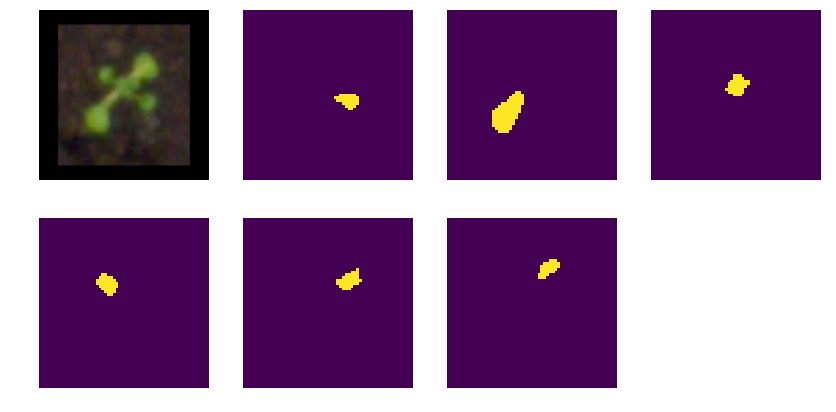

In [8]:
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, use_mini_mask=False)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)
print(mask.shape)


display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 50))])

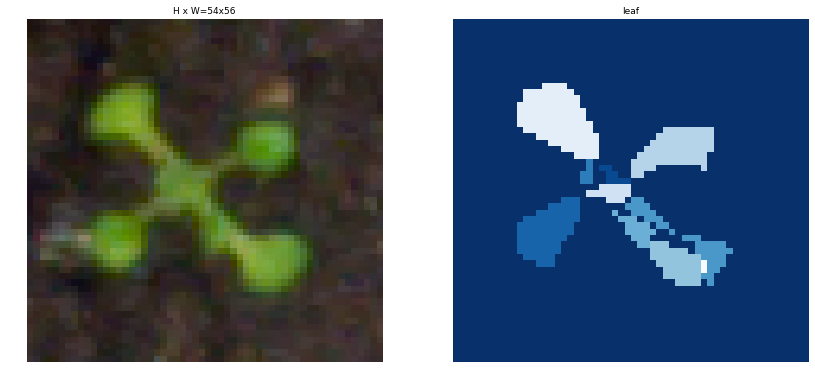

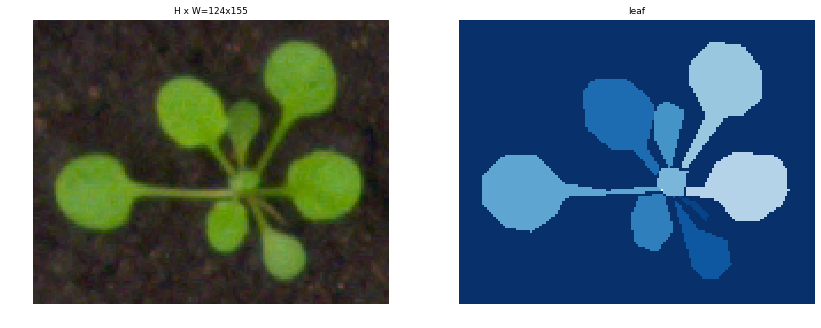

In [9]:
# Load and display random samples
num_images = 2
aux_image_ids = np.random.choice(dataset.image_ids, num_images)
for aux_image_id in aux_image_ids:
    aux_image = dataset.load_image(aux_image_id)
    aux_mask, aux_class_ids = dataset.load_mask(aux_image_id)  
    visualize.display_top_masks(aux_image, aux_mask, aux_class_ids, dataset.class_names, 1)

## Bounding Boxes

These are rectangular regions that cover the objects of interest.

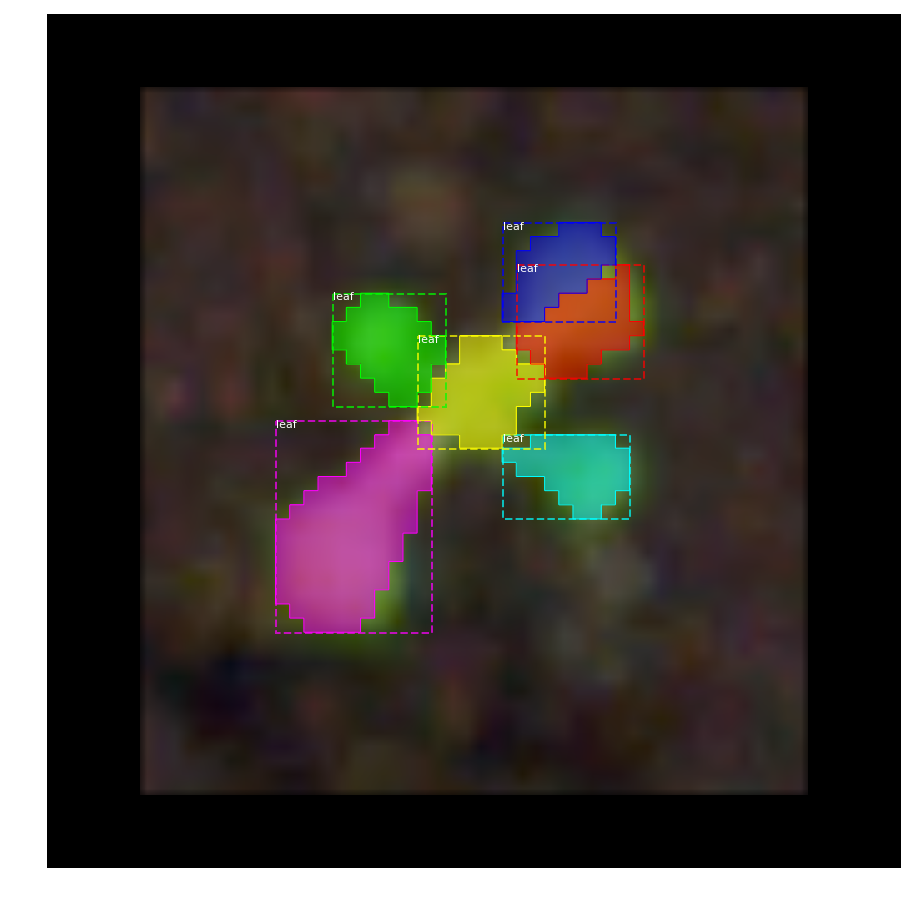

In [10]:
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

image_id  28 leaf.404
image                    shape: (130, 108, 3)         min:    0.00000  max:  178.00000  uint8
mask                     shape: (130, 108, 6)         min:    0.00000  max:    1.00000  bool
class_ids                shape: (6,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (6, 4)                min:   10.00000  max:  118.00000  int32


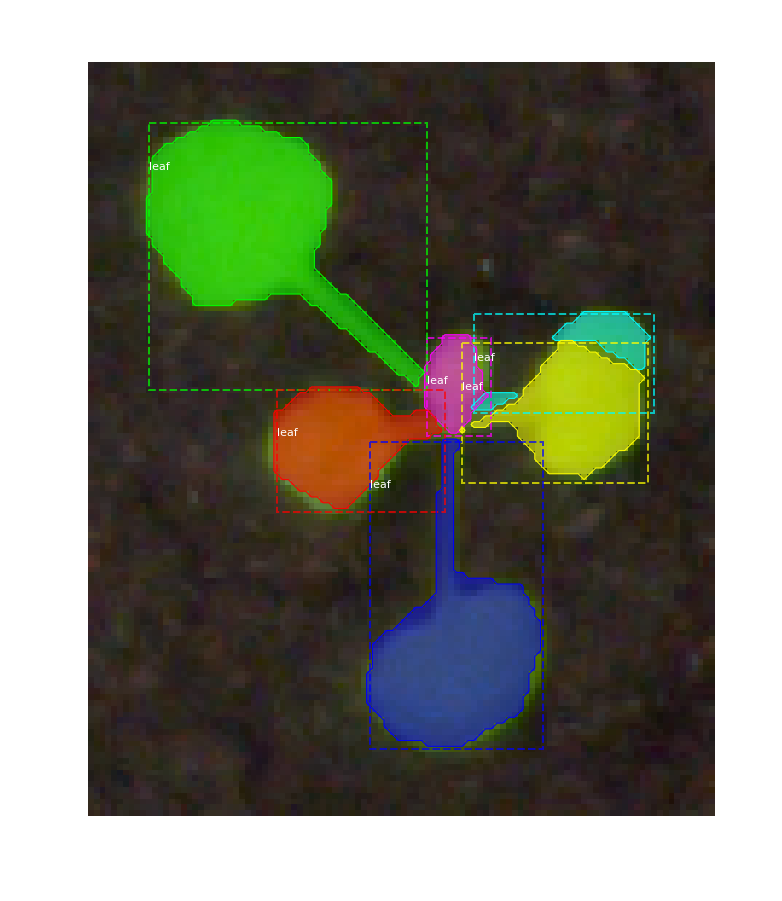

In [11]:
#Let's look at some more examples

# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)